In [1]:
%matplotlib inline

# Classificaiton of Written Numbers

In [202]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load dataset

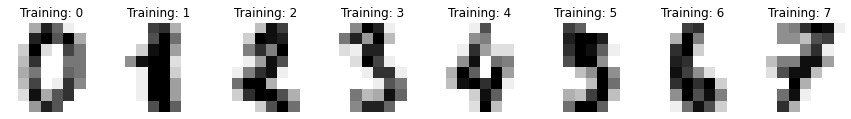

In [169]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=8, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

In [218]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  # Reshape 2-D array to 1-D

clf = svm.SVC(gamma=0.001)                                      # SVC with rbf kernel
clf2 = svm.SVC(kernel="linear")                                 # SVC with linear kernel
clf3 = svm.SVC(kernel="poly")                                   # SVC with ploynomial kernel
clf4 = KNeighborsClassifier(n_neighbors=3)                      # K-Nearest Neighbor
clf5 = RandomForestClassifier(max_depth=8, random_state=0)      # Random Forest

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Fit training data
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)

# Predict testing data
predicted = clf.predict(X_test)
predicted2 = clf2.predict(X_test)
predicted3 = clf3.predict(X_test)
predicted4 = clf4.predict(X_test)
predicted5 = clf5.predict(X_test)

## Accuracy Scores

Classifier: SVC with rbf kernel
Accuracy: 0.9688542825361512



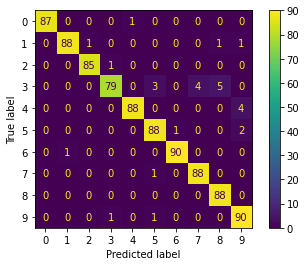

Classifier: SVC with linear kernel
Accuracy: 0.9443826473859844



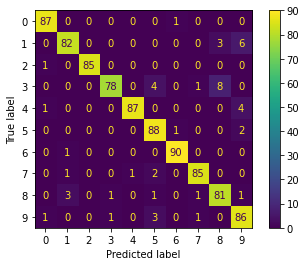

Classifier: SVC with ploynomial kernel
Accuracy: 0.9588431590656284



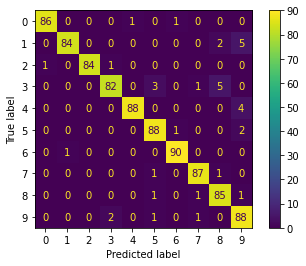

Classifier: K-Nearest Neighbor
Accuracy: 0.9632925472747497



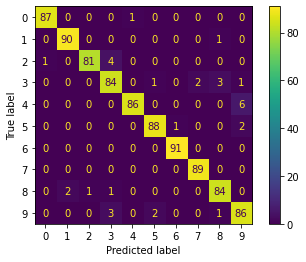

Classifier: Random Forest
Accuracy: 0.9276974416017798



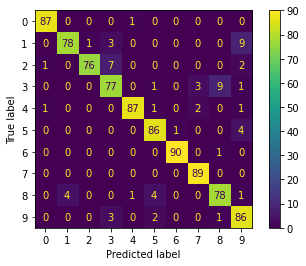

In [219]:
# SVC with rbf kernel
print(
    f"Classifier: SVC with rbf kernel\n"
    f"Accuracy: {metrics.accuracy_score(y_test, predicted)}\n"
)
metrics.plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

# SVC with linear kernel
print(
    f"Classifier: SVC with linear kernel\n"
    f"Accuracy: {metrics.accuracy_score(y_test, predicted2)}\n"
)
metrics.plot_confusion_matrix(clf2, X_test, y_test)  
plt.show()

# SVC with ploynomial kernel
print(
    f"Classifier: SVC with ploynomial kernel\n"
    f"Accuracy: {metrics.accuracy_score(y_test, predicted3)}\n"
)
metrics.plot_confusion_matrix(clf3, X_test, y_test)  
plt.show()

# K-Nearest Neighbor
print(
    f"Classifier: K-Nearest Neighbor\n"
    f"Accuracy: {metrics.accuracy_score(y_test, predicted4)}\n"
)
metrics.plot_confusion_matrix(clf4, X_test, y_test)  
plt.show()

# Random Forest
print(
    f"Classifier: Random Forest\n"
    f"Accuracy: {metrics.accuracy_score(y_test, predicted5)}\n"
)
metrics.plot_confusion_matrix(clf5, X_test, y_test)  
plt.show()